In [42]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions


model = VGG16(weights='imagenet', include_top=True) #Load alredy pre-trained model
model.summary() #Print a list of layers with all the details

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

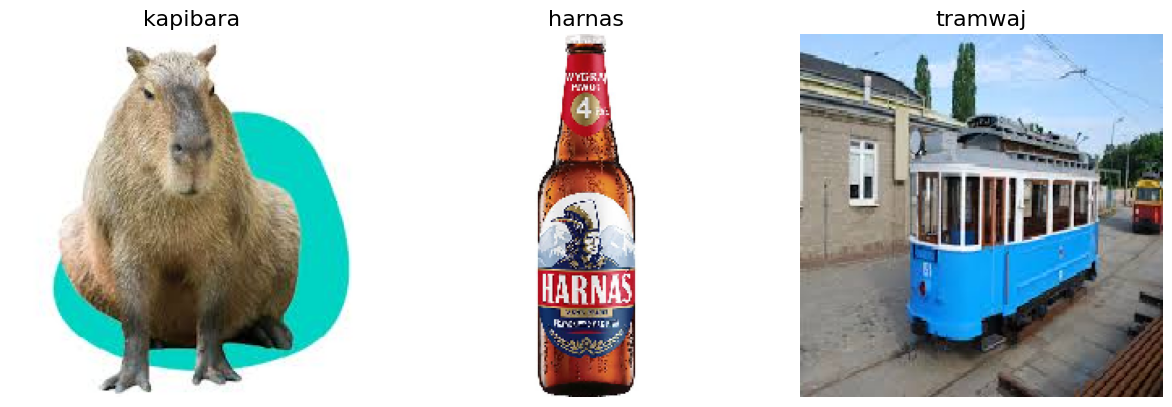

In [43]:
#Further on, each time you will need to complete the code, it will be marked by #TODO

# Assign image titles for your images
image_titles = ['kapibara', 'harnas', 'tramwaj']

# Load images and reshape them
img1 = load_img('/content/kapi.jpg', target_size=(224, 224))
img2 = load_img('/content/harnas.jpg', target_size=(224, 224))
img3 = load_img('/content/tramwaj.jpg', target_size=(224, 224))
#We resize the images into size 224 x 224, as the model prefers those sizes. However, if your images are smaller, you can change those values a little bit.

# Convert them to a Numpy array
images = np.asarray([np.array(img1), np.array(img2), np.array(img3)])

# Preparing input data for VGG16
X = preprocess_input(images)

# Rendering
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Predict the output (probabilities) of the layer, corresponding to an image
preds = model.predict(X)#TODO feed images into the network and see the results (use "predict" function)
best_class = np.argmax(preds, axis=1)#TODO find the best class (use argmax or argsort function)

print(best_class)
print('Predicted:', decode_predictions(preds, top=3)[0]) #Decode prediction based on Imagenet dataset dictionary. Each umerical class is assigned to a real-life label
print('Predicted:', decode_predictions(preds, top=3)[1])
print('Predicted:', decode_predictions(preds, top=3)[2])

1/1 [==============================] - 0s 23ms/step
[337 440 829]
Predicted: [('n02363005', 'beaver', 0.538787), ('n01883070', 'wombat', 0.31191668), ('n02326432', 'hare', 0.08662878)]
Predicted: [('n02823428', 'beer_bottle', 0.8587832), ('n03983396', 'pop_bottle', 0.045337915), ('n07892512', 'red_wine', 0.014141283)]
Predicted: [('n04335435', 'streetcar', 0.9996283), ('n03895866', 'passenger_car', 0.00020440701), ('n03272562', 'electric_locomotive', 0.00011884109)]


In [ ]:
!pip install tf_keras_vis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.2 MB/s eta 0:00:00


In [ ]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

In [ ]:
def visualise_heatmap(map):
  f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
  for i, title in enumerate(image_titles):
      heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
      ax[i].set_title(title, fontsize=16)
      ax[i].imshow(images[i])
      ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
      ax[i].axis('off')
  plt.tight_layout()
  plt.show()

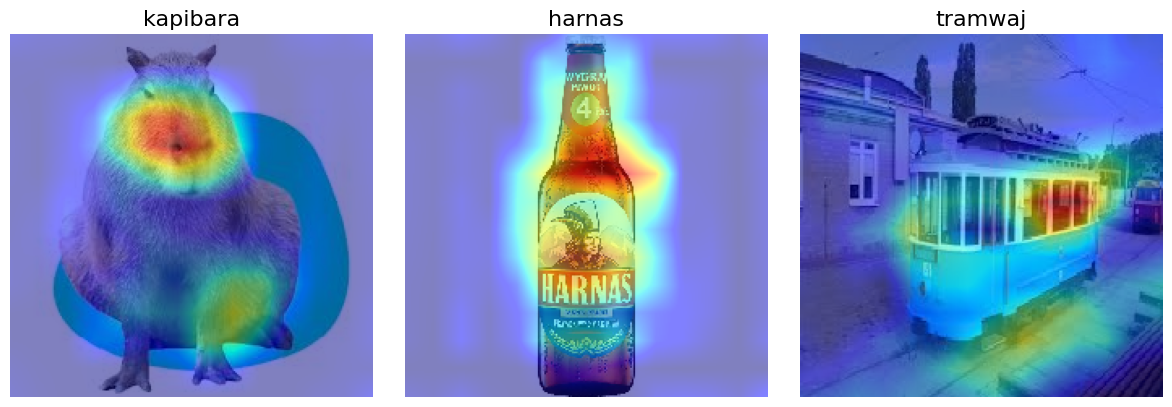

In [ ]:
replace2linear = ReplaceToLinear()
score = CategoricalScore(list(best_class))

gradcam = Gradcam(model,
                  model_modifier=replace2linear,
                  clone=True)

cam = gradcam(score,
              X,
              penultimate_layer=-1)

visualise_heatmap(cam)

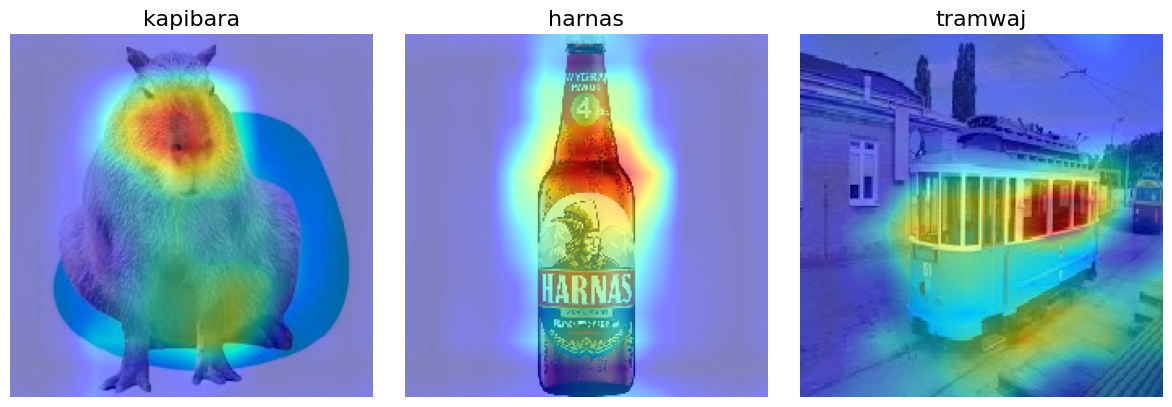

In [ ]:
gradcam = GradcamPlusPlus(model,
                          model_modifier=replace2linear,
                          clone=True)

cam = gradcam(score,
              X,
              penultimate_layer=-1)

visualise_heatmap(cam)

48/48 [==============================] - 13s 118ms/step


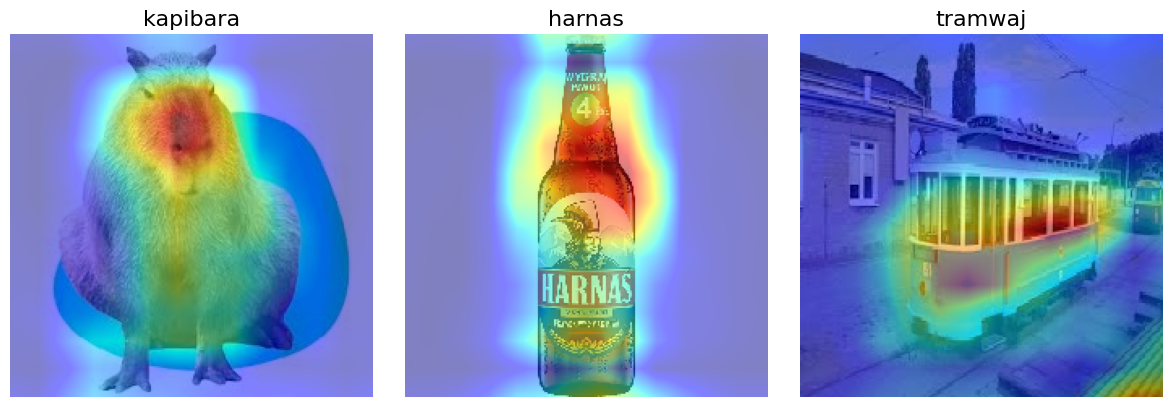

In [ ]:
scorecam = Scorecam(model)
cam = scorecam(score, X, penultimate_layer=-1)
visualise_heatmap(cam)

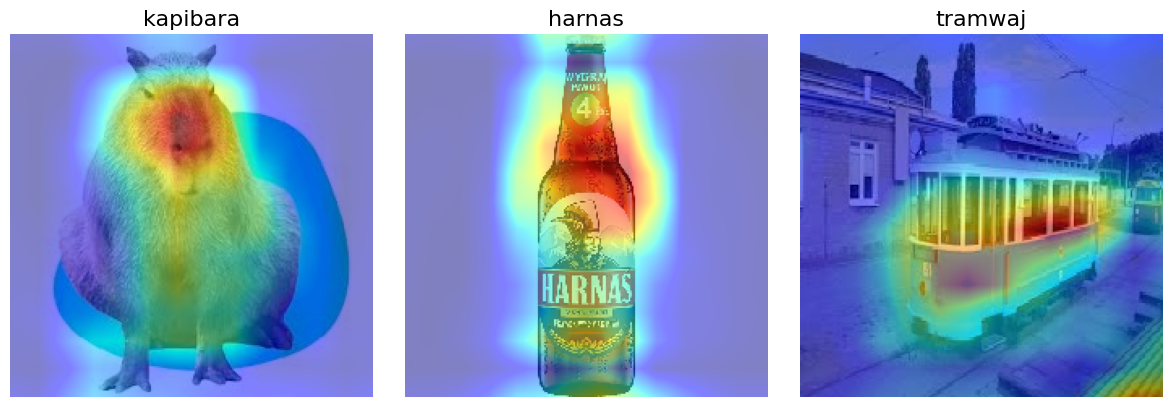

In [ ]:
saliency = Saliency(model, model_modifier=replace2linear, clone=True)
saliency_map = saliency(score, X)
visualise_heatmap(saliency_map)

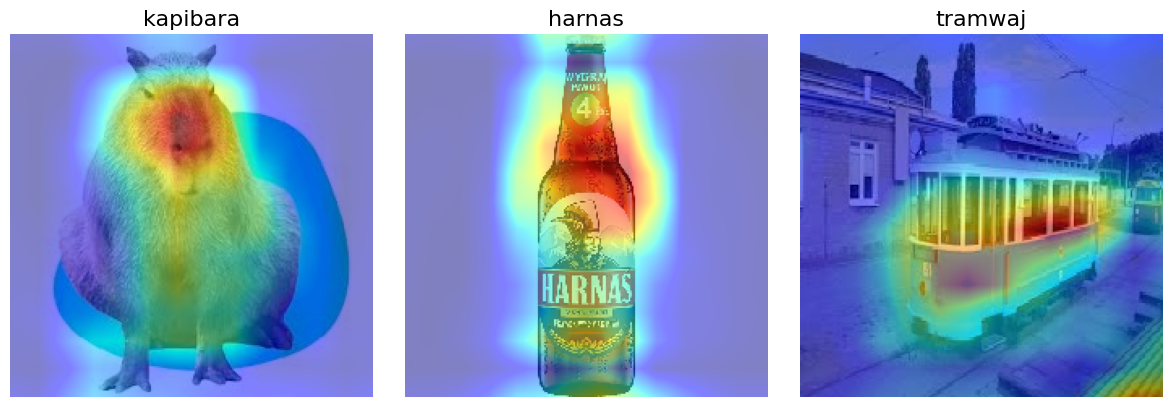

In [ ]:
saliency_map = saliency(score, X, smooth_samples=20, smooth_noise=0.20)
visualise_heatmap(saliency_map)

In [36]:
image_titles = ['kapibara', 'harnas', 'tramwaj']

# Load images and reshape them
img1 = load_img('/content/madagaskar2.jpg', target_size=(224, 224))
#We resize the images into size 224 x 224, as the model prefers those sizes. However, if your images are smaller, you can change those values a little bit.

# Convert them to a Numpy array
images = np.asarray([np.array(img1),np.array(img1),np.array(img1)])

# Preparing input data for VGG16
X = preprocess_input(images)


In [37]:
# Predict the output (probabilities) of the layer, corresponding to an image
preds = model.predict(X)#TODO feed images into the network and see the results (use "predict" function)
best_class = np.argmax(preds, axis=1)#TODO find the best class (use argmax or argsort function)

print(best_class)
print('Predicted:', decode_predictions(preds, top=13)[0]) #D

1/1 [==============================] - 0s 29ms/step
[476 476 476]
Predicted: [('n02966193', 'carousel', 0.4420241), ('n03724870', 'mask', 0.19326246), ('n03874599', 'padlock', 0.0728654), ('n02999410', 'chain', 0.031431325), ('n03532672', 'hook', 0.025502944), ('n04462240', 'toyshop', 0.024059206), ('n03840681', 'ocarina', 0.023489172), ('n03017168', 'chime', 0.020432634), ('n04458633', 'totem_pole', 0.012658986), ('n07695742', 'pretzel', 0.011672341), ('n02843684', 'birdhouse', 0.010352286), ('n04371774', 'swing', 0.010096388), ('n04200800', 'shoe_shop', 0.008175831)]


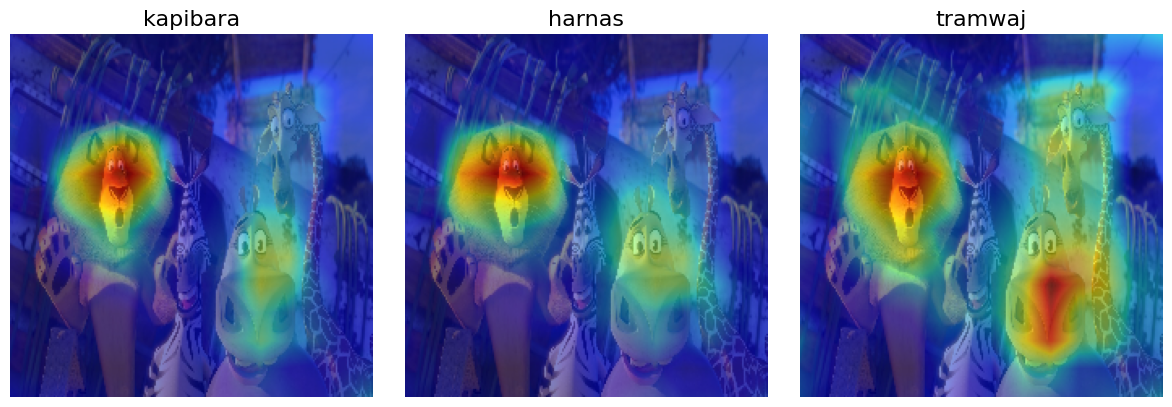

In [38]:
gradcam = GradcamPlusPlus(model,
                          model_modifier=replace2linear,
                          clone=True)

cam = gradcam(score,
              X,
              penultimate_layer=-1)

visualise_heatmap(cam)

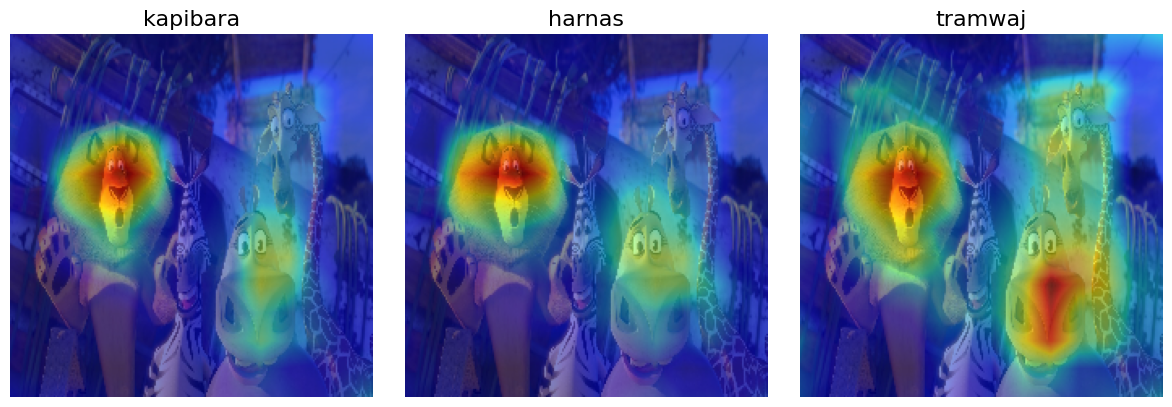

In [ ]:
saliency_map = saliency(score, X, smooth_samples=20, smooth_noise=0.20)
visualise_heatmap(saliency_map)

ZADANIE 2

In [55]:
layer_outputs = [layer.output for layer in model.layers] #Loop through the model defined in the beginning to access outputs of individual layers
activation_model = models.Model(model.input, layer_outputs)
img3 = load_img('/content/tramwaj.jpg', target_size=(224, 224,3))
X_reshaped = np.asarray([img3])#TODO take one image and reshape it into size (1,224,224,3)

activations = model.predict(X_reshaped)#TODO use the predict function on the activation model to get the intermediate activations

layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name)
print(layer_names)
# print(activations)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name != 'block1_conv2':   #TODO Specify the name of the layer that you want to see. Choose one name from the model summary we printed in the beginning
        number_of_feature_maps = layer_activation.shape[-1]
        feature_map_shape = layer_activation.shape[1]
        n_cols = number_of_feature_maps // images_per_row
        display_grid = np.zeros((feature_map_shape * n_cols, images_per_row * feature_map_shape))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image /= np.max(channel_image)
                display_grid[col * feature_map_shape : (col + 1) * feature_map_shape, row * feature_map_shape : (row + 1) * feature_map_shape] = channel_image
        scale = 1. / feature_map_shape
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

1/1 [==============================] - 0s 18ms/step
['input_2', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool', 'flatten', 'fc1', 'fc2']


IndexError: tuple index out of range